# Dependencies and imports

In [ ]:
# Dependencies
%pip install numpy
%pip install pyvista
%pip install "pyvista[jupyter]" 
%pip install trame ipywidgets
%pip install matplotlib
%pip install torch torchvision torchaudio
%pip install nnunetv2
%pip install simpleitk

In [1]:
import numpy as np
import SimpleITK as sitk
import pyvista as pv
import matplotlib.pyplot as plt

# Loading in the data

In [2]:
# volume = pv.read(f"nnUNet_raw/Dataset100_normal/imagesTs/NORMAL_001_0000.nrrd")
# volume = pv.read("SECRET_002_0000.nrrd")
# annotations = pv.read(f"SECRET_002.nrrd")
# centerline = pv.read(f"nnUNet_raw/Dataset100_normal/ReorientedCenterlines/NORMAL_1.vtp")
annotations_true = pv.read(f"../ground_NORMAL_017.nrrd")
annotations_inf_1 = pv.read(f"../exp1_NORMAL_017.nrrd")
annotations_inf_2 = pv.read(f"../exp2_NORMAL_017.nrrd")
annotations_inf_3 = pv.read(f"../exp3_NORMAL_017.nii.gz")
# mesh = pv.read(f"nnUNet_raw/Dataset100_normal/ReorientedMeshes/Normal_1.stl")

# annotations = pv.read(f"Results/NORMAL_001.nrrd")

# Exploratory analysis

In [ ]:
print(annotations.point_data["ImageScalars"] )

print("Annotations:\n",annotations)
scalar_values = annotations.point_data["ImageScalars"] 
print(f"Min-Max: {scalar_values.min()} to {scalar_values.max()}")



[0 0 0 ... 0 0 0]
Annotations:
 ImageData (0x1b43064bee0)
  N Cells:      48046264
  N Points:     48496640
  X Bounds:     -7.870e+01, 8.598e+01
  Y Bounds:     -9.080e+01, 7.388e+01
  Z Bounds:     -2.070e+02, -9.200e+01
  Dimensions:   512, 512, 185
  Spacing:      3.223e-01, 3.223e-01, 6.250e-01
  N Arrays:     1
Min-Max: 0 to 1


Widget(value='<iframe src="http://localhost:65311/index.html?ui=P_0x1b419bf7f10_48&reconnect=auto" class="pyvi…

## Volumes

Volume:
 ImageData (0x7f164a416b00)
  N Cells:      54835410
  N Points:     55312384
  X Bounds:     -1.027e+02, 9.192e+01
  Y Bounds:     -9.850e+01, 9.612e+01
  Z Bounds:     -2.115e+02, -8.025e+01
  Dimensions:   512, 512, 211
  Spacing:      3.809e-01, 3.809e-01, 6.250e-01
  N Arrays:     1
Min-Max: -3024 to 1734


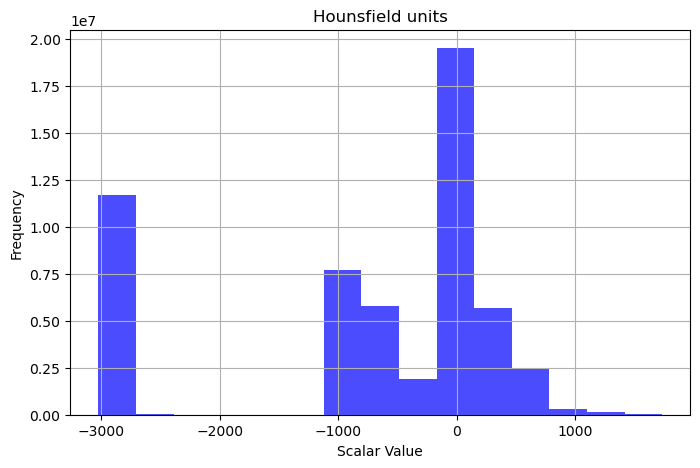

Annotations:
 ImageData (0x7f164a416b60)
  N Cells:      54835410
  N Points:     55312384
  X Bounds:     -1.027e+02, 9.192e+01
  Y Bounds:     -9.850e+01, 9.612e+01
  Z Bounds:     -2.115e+02, -8.025e+01
  Dimensions:   512, 512, 211
  Spacing:      3.809e-01, 3.809e-01, 6.250e-01
  N Arrays:     1
Min-Max: 0 to 1


In [ ]:
print("Volume:\n",volume)


scalar_values = volume.point_data["ImageScalars"] 
print(f"Min-Max: {scalar_values.min()} to {scalar_values.max()}")

plt.figure(figsize=(8, 5))
plt.hist(scalar_values.flatten(), bins=15, color='blue', alpha=0.7)
plt.xlabel("Scalar Value")
plt.ylabel("Frequency")
plt.title(f"Hounsfield units")
plt.grid(True)
plt.show()


print("Annotations:\n",annotations)
scalar_values = annotations.point_data["ImageScalars"] 
print(f"Min-Max: {scalar_values.min()} to {scalar_values.max()}")


## Meshes

In [ ]:
print(centerline)
print(mesh)

PolyData (0x7fcfc727e4a0)
  N Cells:    4
  N Points:   4994
  N Strips:   0
  X Bounds:   -3.316e+01, 5.204e+01
  Y Bounds:   -1.088e+02, -1.516e+01
  Z Bounds:   -1.603e+02, -7.493e+01
  N Arrays:   1
PolyData (0x7fcfc727e620)
  N Cells:    46156
  N Points:   23076
  N Strips:   0
  X Bounds:   -3.436e+01, 5.289e+01
  Y Bounds:   -1.098e+02, -1.447e+01
  Z Bounds:   -1.612e+02, -7.288e+01
  N Arrays:   0


# Pyvista visualizer
<span style="color:red">*This will segfault if using the juypter.utwente cluster, so run visualizations locally for now!*</span><br> This is because we're running things inside a container (xserver missing)

In [4]:
clim = (0, 300)


In [ ]:
plotter = pv.Plotter()
# plotter.add_volume(volume, clim=clim, cmap="gray")
# plotter.add_volume(annotations,cmap="cividis",opacity="sigmoid")  
plotter.show()

Widget(value='<iframe src="http://localhost:55105/index.html?ui=P_0x21283ec7490_2&reconnect=auto" class="pyvis…

In [3]:

# thresholded_true = annotations.threshold(0.5)
# thresholded_true = annotations_true.threshold(0.5)
# thresholded_inf = annotations_inf.threshold(0.5)

# thresholded_true = annotations_true.threshold(0.5)
# thresholded_inf_1 = annotations_inf_1.threshold(0.5)
# thresholded_inf_2 = annotations_inf_2.threshold(0.5)
thresholded_inf_3 = annotations_inf_3.threshold(0.5)



In [4]:
plotter = pv.Plotter()
# plotter.add_volume(volume, clim=clim, cmap="gray")
# plotter.add_volume(annotations,cmap="cividis",opacity="sigmoid")  

# plotter.add_mesh(
#     thresholded_true, 
#     scalars=thresholded_true.active_scalars_name,
#     clim=[thresholded_true.active_scalars.min(), thresholded_true.active_scalars.max()],  
#     cmap=["#F46920"], 
#     opacity=1.0,  
#     show_scalar_bar=True
# )
# plotter.add_mesh(
#     thresholded_inf_1, 
#     scalars=thresholded_inf_1.active_scalars_name,
#     clim=[thresholded_inf_1.active_scalars.min(), thresholded_inf_1.active_scalars.max()],  
#     cmap=["#F46920"], 
#     opacity=1.0,  
#     show_scalar_bar=True
# )
# plotter.add_mesh(
#     thresholded_inf_2, 
#     scalars=thresholded_inf_2.active_scalars_name,
#     clim=[thresholded_inf_2.active_scalars.min(), thresholded_inf_2.active_scalars.max()],  
#     cmap=["#F46920"], 
#     opacity=1.0,  
#     show_scalar_bar=True
# )
plotter.add_mesh(
    thresholded_inf_3, 
    scalars=thresholded_inf_3.active_scalars_name,
    clim=[thresholded_inf_3.active_scalars.min(), thresholded_inf_3.active_scalars.max()],  
    cmap=["#F46920"], 
    opacity=1.0,  
    show_scalar_bar=True
)
# plotter.add_mesh(centerline, color="red", line_width=2)  
# plotter.add_mesh(mesh, color="blue",opacity=0.7)
plotter.show()

Widget(value='<iframe src="http://localhost:35209/index.html?ui=P_0x74479200cd70_0&reconnect=auto" class="pyvi…